In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def f(x,y,z):
    return (5/(648*np.pi))*(x*x + y*y)

def U(): return np.random.rand()

In [71]:
def integrate(debug = False):
    R = 3

    N = 100
    n = 0

    Σf  = 0
    Σf2 = 0

    for dummy in range(N):
        x = 2*R*U() - R
        y = 2*R*U() - R
        z = 2*R*U() - R
        if x**2 + y**2 + z**2 < R**2:
            n   = n + 1

            Σf  = Σf  + f(x, y, z)
            Σf2 = Σf2 + f(x, y, z)**2   # tmp = f(x,y,z), tmp**2

    μ  = Σf/n
    σ2 = Σf2/n - μ**2
    s2 = σ2*(n/(n-1))
    s  = s2**0.5      

    V = (4/3.)*np.pi*R**3

    I  = μ*V
    δI = V*s/n**0.5   

    if debug: print('I = %2.3f ± %2.3f'%(I , δI))
        
    return I

In [64]:
integrals = [integrate() for i in range(1000)]

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  3.,
         2.,  2.,  5.,  2.,  6.,  4.,  8., 13., 10., 15., 15., 17., 16.,
        21., 36., 34., 29., 37., 45., 38., 44., 41., 48., 41., 46., 43.,
        43., 31., 49., 40., 25., 29., 29., 17., 24., 15., 20., 14.,  7.,
         9.,  7.,  3.,  5.,  2.,  1.,  2.,  1.,  1.,  2.,  0.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.5       , 0.51010101, 0.52020202, 0.53030303, 0.54040404,
        0.55050505, 0.56060606, 0.57070707, 0.58080808, 0.59090909,
        0.6010101 , 0.61111111, 0.62121212, 0.63131313, 0.64141414,
        0.65151515, 0.66161616, 0.67171717, 0.68181818, 0.69191919,
        0.7020202 , 0.71212121, 0.72222222, 0.73232323, 0.74242424,
        0.75252525, 0.76262626, 0.77272727, 0.78282828, 0.79292929,
        0.8030303 , 0.81313131,

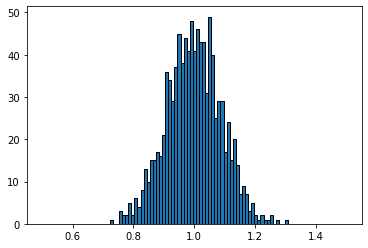

In [67]:
#mybins = [0 + 0.1*i for i in range(21)] # bins np.linspace(0, 2, 21)
mybins = np.linspace(0.5, 1.5, 100)

plt.hist(integrals, bins = mybins, ec = 'black')

In [69]:
integrals = np.array(integrals)
print(integrals.mean(), integrals.std())

0.9971853490894695 0.08894857289803004


In [79]:
integrate(debug = True)

I = 0.974 ± 0.077


0.9743902045027844

In [107]:
def integrateHitOrMiss(debug = False):
    R = 3

    N = 1000
    n = 0
    fmax = f(R, R, 0)
    
    for dummy in range(N):
        x = 2*R*U() - R
        y = 2*R*U() - R
        z = 2*R*U() - R
        w = fmax*U()
        if x**2 + y**2 + z**2 < R**2 and w<(f(x, y, z)):
            n   = n + 1
            
    p = n/float(N)
    V = fmax*(2*R)**3

    I  = V*p
    δI = V*(p*(1-p))**0.5/N**0.5   

    if debug: print('I = %2.3f ± %2.3f'%(I , δI))
        
    return I

integrateHitOrMiss(debug = True)

I = 0.984 ± 0.092


0.9835775483079132

In [92]:
(4/3.)*np.pi*R**3

113.09733552923254